
# Forcing data

This example uses data from ECMWF ERA5 obtained from [CDS](https://cds.climate.copernicus.eu/#!/home)

A common format for multidimensional data is [NetCDF](https://www.unidata.ucar.edu/software/netcdf/).

An excellent python package for working with NetCDF in Python is [Xarray](http://xarray.pydata.org/en/stable/).

In [1]:
! pip install netcdf4 xarray

In [2]:
import xarray as xr

ds = xr.open_dataset("data/era5_small.nc")
ds

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 121, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 40.5 40.25 40.0
  * time       (time) datetime64[ns] 1977-12-01 ... 1977-12-03T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-21 06:03:31 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [3]:
ds.t2m

<xarray.DataArray 't2m' (time: 12, latitude: 121, longitude: 121)>
[175692 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 40.5 40.25 40.0
  * time       (time) datetime64[ns] 1977-12-01 ... 1977-12-03T18:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [4]:
ds0 = ds.isel(time=0)
ds0

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 121)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 40.5 40.25 40.0
    time       datetime64[ns] 1977-12-01
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    d2m        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    msl        (latitude, longitude) float32 ...
    sp         (latitude, longitude) float32 ...
    tcc        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-21 06:03:31 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

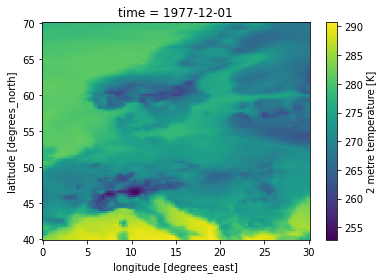

In [5]:
ds0.t2m.plot()

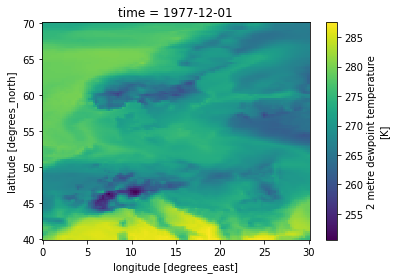

In [6]:
ds0.d2m.plot()

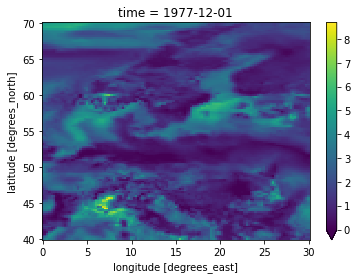

In [7]:
(ds0.t2m - ds0.d2m).plot(vmin=0)

## Pressure

Atmospheric pressure comes in different flavors.

`Surface pressure` is the pressure at ground level, i.e. following the terrain.

In the following plot you can clearly see the decrease in surface pressure with altitude in areas with mountains.

This is *NOT* the variable used by MIKE 21 FM HD.

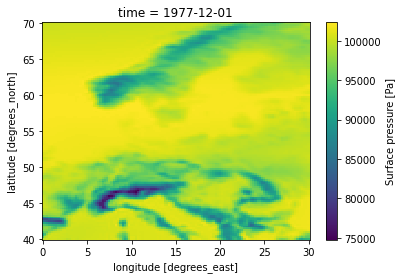

In [8]:
ds0.sp.plot()

MIKE 21 FM HD expects the atmospheric pressure reduced to Mean Sea Level.

In the following plot the pressure field has a much smaller range, since the variation with altitude have been removed.

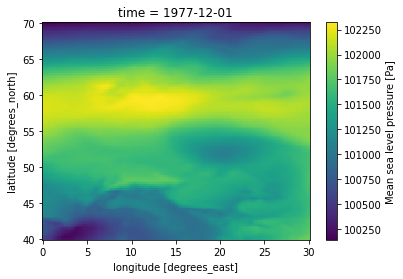

In [9]:
ds0.msl.plot()

## Wind

In [10]:
ds0.u10

<xarray.DataArray 'u10' (latitude: 121, longitude: 121)>
array([[ 1.233598e+01,  1.244608e+01,  1.254551e+01, ...,  2.805750e+00,
         3.464365e+00,  4.225742e+00],
       [ 1.171206e+01,  1.173342e+01,  1.180081e+01, ...,  3.675896e+00,
         4.051579e+00,  4.046908e+00],
       [ 1.088929e+01,  1.090731e+01,  1.092533e+01, ...,  3.284864e+00,
         3.250832e+00,  3.216800e+00],
       ...,
       [ 9.500182e-01,  1.162216e+00,  1.508539e+00, ..., -1.018486e+00,
        -1.288071e+00, -6.961848e-01],
       [ 9.146519e-01,  7.585062e-01,  5.202838e-01, ..., -1.496748e-01,
        -9.077154e-01, -1.098560e+00],
       [ 1.052297e-01, -5.814110e-01, -6.000952e-01, ...,  1.979830e-01,
        -1.770337e-01, -8.692741e-04]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 40.5 40.25 40.0
    time       datetime64[ns] 1977-12-01
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

## Convert to dfs2

### Sub-region

In [11]:
ds_aoi = ds.sel(longitude=slice(10,30), 
                latitude=slice(60,45)) # N -> S
ds_aoi

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 61, time: 12)
Coordinates:
  * longitude  (longitude) float32 10.0 10.25 10.5 10.75 ... 29.5 29.75 30.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 1977-12-01 ... 1977-12-03T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-21 06:03:31 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

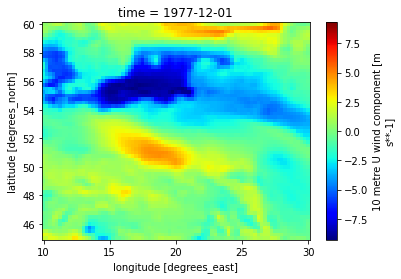

In [12]:
ds_aoi.isel(time=0).u10.plot(cmap='jet')

In [13]:
import pandas as pd

time = pd.DatetimeIndex(ds.time)
time

DatetimeIndex(['1977-12-01 00:00:00', '1977-12-01 06:00:00',
               '1977-12-01 12:00:00', '1977-12-01 18:00:00',
               '1977-12-02 00:00:00', '1977-12-02 06:00:00',
               '1977-12-02 12:00:00', '1977-12-02 18:00:00',
               '1977-12-03 00:00:00', '1977-12-03 06:00:00',
               '1977-12-03 12:00:00', '1977-12-03 18:00:00'],
              dtype='datetime64[ns]', freq=None)

In [14]:
data = [ds_aoi.msl.values / 100.0, # Pa -> hPa
        ds_aoi.u10.values,
        ds_aoi.v10.values,
        ds_aoi.t2m.values - 273.15] # K -> °C

In [15]:
from mikeio import Dataset
from mikeio.eum import EUMType, EUMUnit, ItemInfo


my_ds = Dataset(data=data,
                time=time,
                items=[
                 ItemInfo("MSLP", EUMType.Pressure, EUMUnit.hectopascal),
                 ItemInfo("U 10m", EUMType.Wind_Velocity, EUMUnit.meter_per_sec),
                 ItemInfo("V 10m", EUMType.Wind_Velocity, EUMUnit.meter_per_sec),
                 ItemInfo("Temperature", EUMType.Temperature, EUMUnit.degree_Celsius)]
                 )
my_ds

<mikeio.Dataset>
Dimensions: (12, 61, 81)
Time: 1977-12-01 00:00:00 - 1977-12-03 18:00:00
Items:
  0:  MSLP <Pressure> (hectopascal)
  1:  U 10m <Wind Velocity> (meter per sec)
  2:  V 10m <Wind Velocity> (meter per sec)
  3:  Temperature <Temperature> (degree Celsius)

In [16]:
ds_aoi.longitude.values[0], ds.longitude.values[-1]

(10.0, 30.0)

In [17]:
ds_aoi.longitude.values[1] - ds_aoi.longitude.values[0]

0.25

In [18]:
ds_aoi.latitude.values[0], ds_aoi.latitude.values[-1]

(60.0, 45.0)

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(12, 61, 81)

In [21]:
lon_origin = ds_aoi.longitude.values[0]
lon_origin

10.0

In [22]:
lat_origin = ds_aoi.latitude.values[-1] # Southern-most point
lat_origin

45.0

In [23]:
# Flip dataset to match MIKE convention
# my_ds = my_ds.flipud()

In [24]:
from mikeio import Dfs2

dfs = Dfs2()
dfs.write("era5_aoi.dfs2", data=my_ds, coordinate=["LONG/LAT", lat_origin, 45.0, 0.0], dx=0.25, dy=0.25)


Screenshot of U 10m from MIKE Zero

![](images/era5_u10_dfs2.png)

## Unstructured grid forcing

E.g. roughness map

<AxesSubplot:>

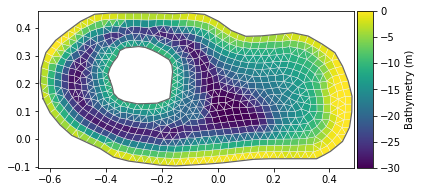

In [25]:
from mikeio import Mesh, Dfsu

msh = Mesh("data/FakeLake.dfsu")
msh.plot()

Text(0.5, 1.0, 'This is only an example...')

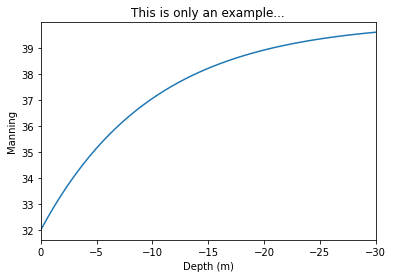

In [26]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(0,-30)
manning = 32 + (40 - 32)*(1 - np.exp(z/10))

plt.plot(z, manning)
plt.xlim(0,-30)
plt.ylabel("Manning")
plt.xlabel("Depth (m)")
plt.title("This is only an example...")

In [27]:
ze = msh.element_coordinates[:,2]

In [28]:
me = 32 + (40 - 32)*(1 - np.exp(ze/10))

In [33]:
me2d = np.atleast_2d(me) # Introduce time axis
me2d.shape

(1, 1011)

In [54]:
from mikeio.eum import ItemInfo
from mikeio import Dataset

my_ds = Dataset(data=[me2d],
                time="2000-1-1", # For static data, this is not used by MIKE 21
                items=[ItemInfo("Roughness")])
my_ds

<mikeio.Dataset>
Dimensions: (1, 1011)
Time: 2000-01-01 00:00:00 - 2000-01-01 00:00:00
Items:
  0:  Roughness <Undefined> (undefined)

In [49]:
dfs = Dfsu("data/FakeLake.dfsu") # use this file as template
dfs.write("manning.dfsu", data=my_ds)

In [45]:
dfs = Dfsu("manning.dfsu")
dfs

Dfsu2D
Number of elements: 1011
Number of nodes: 798
Projection: PROJCS["UTM-17",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",-81],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]
Items:
  0:  Roughness <Undefined> (undefined)
Time: time-invariant file (1 step) at 2000-12-31 00:00:00

<AxesSubplot:title={'center':'Manning'}>

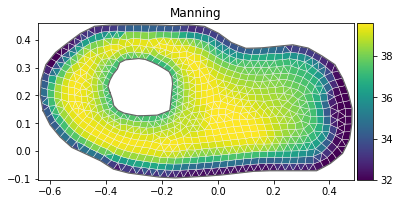

In [42]:
ds = dfs.read()
dfs.plot(ds["Roughness"][0], title="Manning")